# RAG

## 6.0 Introduction
        

- 진행 방식
    - Document GPT APP 생성해볼 것
    - Streamlit을 쓰지는 않을 것이라 투박할 것
    - jupyter notebook으로 먼저 처리하면서 app을 구성하고 채팅으로 만드는 단계 흐름을 알아볼것
    - Streamlit UI 제공
   
- RAG를 알아볼 것임 : Retrieval 
    - 모델은 많은 데이터을 학습하지만, 개인적인 데이터엔 접근불가함(개인DB, 문서)
    - 우리는 RAG를 사용해
        - 우리가 질문을 하면 2개의 일을 하게됨
        - foo가 뭐지? 그 질문을 프롬프트에 전달하면, 그와 관련된 문서를 준비해
        - 저장된 벡터나 검색기를 사용해서 foo가 뭔지를 알아봄
            - 정확히 foo 단어가 있는지 여부를 확인하는 것 + 의미론적으로 분석해서 알아낼것
        - 모델은 foo가 뭔지 모름
        - 그럼 foo와 관련된 문서를 가져올 것
        - 그 문서들을 context로써 우리의 질문과 함께 큰 LM에 보낼 것임
        - 이 모델은 기존에 학습된 수많은 데이터와 함께 우리가 모델이 더 나은 답변을 하기 위해 추가로 전송한 data까지 가지게 됨
        - 이게 RAG임
        - 개인으로 제공된 데이터를 사용하거나 탐색함으로써 우리가 LM의 능력을 더 확장시키는 것
    - 우리는 질문을 할거고, 질문을 할때 우리는 저장된 vector에서 foo와 연관된 자료를 가져와
        - 이때 탐색은 좀 더 복잡한 알고리즘으로 단순히 foo라는 단어가 있는지 여부를 보는 것이 아님
    - 일단 foo에 대한 질문을 할거고 관련 문서를 가져와서 질문과 함께 그 문서들을 프롬프트로 전달할거야
    - 그 뒤에 모델로 해당 프롬프트를 전달할것임
    - 모델은 우리의 질문과 학습된 데이터, 우리가 추가로 보낸 데이터까지 가지게 됨
    - 원한다면 모델에게 우리가 보낸 문서만을 가지고 학습하게 할 수 있음
    - 왜냐면 우리 문서가 더 최신 데이터를 가지고있을 수 있음
    - 이게 RAG임

- RAG 방식 중 "stuff  document" 방식
    - RAG 방식은 다양하고, 모든 문서를 프롬프트에 넣ㄱ 모델로 전달하는 방식은 stuff
    - ![image.png](attachment:image.png)
- 그 외, Refine/Map Reduce 방식 같은 걸 응용할 것
- 얼마나 문서를 많이 갖고있는지, 얼마만큼의 비용을 감당할지, 어떤 모델을 사용할지등에 따라 달라짐
- 일단 쥬피터 노트북에서 대략적으로 진행하고 streamlit을 사용해서 쥬피터에서 작성한 document GPT를 멋진 UI로 가지게 변환할 것
    

## 6.1 Data Loaders and splitters

- RAG의 첫번째 단계 : Retrieval을 알아볼 것
- 랭체인 모듈인데, 
    - 소스데이터가 있고
    - 로더가 있고, 데이터를 로드하고 데이터를 변환할거임(데이터를 분할할거임)
        - 나중에 임베드하기 위해 분할할거임
    - 왜 임베드를 해야하는지, 뭘할지 알아볼것임
    - 데이터를 retrieval를 하는 과정임
    - 어떤 소스에서 데이터를 로드하고, 데이터를 변환하고 이럴 임베드한다(컴퓨터가 이해할 수있도록 숫자로 변환), 이 숫자를 저장해뒀다가 나중에 특정숫자를 검색함
- Embed, Store, Retrieve 과정은 나중에 하고 이번 강의에선 안할거야
    - 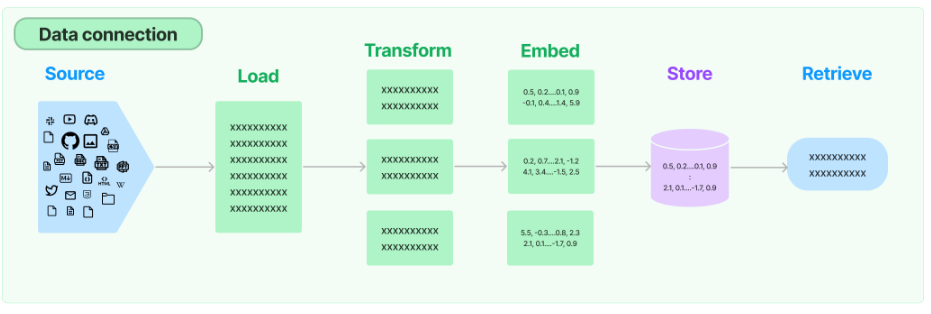

- 랭체인 홈피 : https://js.langchain.com/v0.1/docs/modules/data_connection/
    - 예전버전 1.0 / 현재는 최신 업데이트됨
    - 다양한 documents loader가 있는데, file이나 web file 등을 load할 수 있음
        - pdf, figma, ppt, notion, github, s3 file, slack 메세지 등등 정말 많은 다큐먼트 로더가 있음
    - 해당 로더로 다큐먼트를 읽어서 하나의 랭체인 문서에 집어넣음
    
    

- UnstructuredFileLoader 지원 파일 타입
- 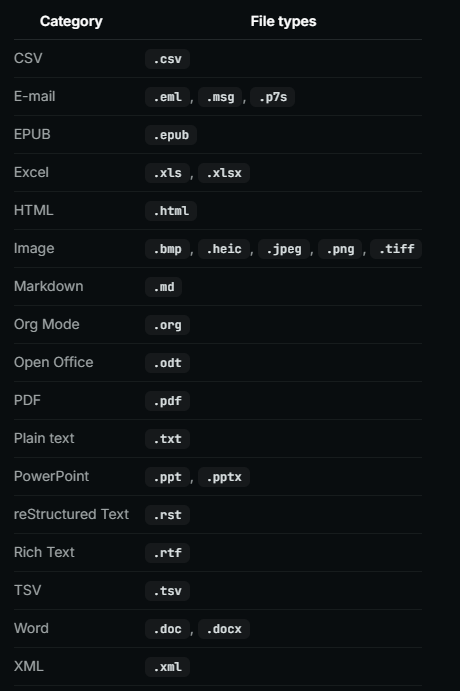
- https://docs.unstructured.io/welcome

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader

loader = UnstructuredFileLoader("./files/chapter-one.txt") 
document = loader.load()
document

[Document(page_content='Movie Scripts  >   Frozen (2013)\n\nFrozen (2013) Movie Script\n\nBorn of cold and Winter air And mountain rain combining,\n\nThis icy force both foul and fair.\n\nHas a frozen heart worth mining.\n\nCut through the heart, Cold and Clear.\n\nStrike for love And Strike for fear.\n\nSee the beauty Sharp and Sheer.\n\nSplit the ice apart.\n\nAnd break the frozen heart.\n\nHup! Ho! Watch your step! Let it go!\n\nHup! Ho! Watch your step! Let it go!\n\nBeautiful! Powerful!\n\nDangerous! Cold!\n\nIce has a magic Can\'t be controlled.\n\nStronger than one, Stronger than ten.\n\nStronger than a hundred men!\n\nBorn of cold and winter air And mountain rain combining.\n\nThis icy force both Foul and Fair.\n\nHas a frozen heart worth mining.\n\nCut through the heart, Cold and Clear.\n\nStrike for love and strike for fear.\n\nThere\'s beauty and there\'s Danger here.\n\nSplit the ice apart!\n\nBeware the frozen heart.\n\nCome on, Sven!\n\nElsa. Psst\n\nElsa!\n\nWake up. Wak

- 문서가 너무 커서 분할해줘야함
- 질문에 답해야할때, 필요한 파일의 부분들만 전달해줘야함
- 특정 문자열 중 하나를 찾는다고하면, 이 문자열을 갖고있는 문서만 언어모델에 주면 되는 것임
- 즉 문서의 문자를 분할해서 작은 조각으로 분할해주고, 프롬프터도 짧아지고 LLM에게 필요한 부분만 줄 수있음
 

In [ ]:
# split document
len(document) # 1개 / [Document(...] Document로 이뤄진 리스트인데, 전체 챕터가 하나의 문서에 들어있음

# 아주 일반적인 text splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter() # 문장/문단 기준으로 끊어주기/ 문장 중간에서 분할하지 않도록 하는 것이 목적으로 중간에 잘려서 의미있는 문장을 잃지않게 함
loader = UnstructuredFileLoader("./files/chapter-one.txt") 

# 첫번째 방법
docs=loader.load()
splitter.split_documents(docs)

# 두번째 방법
len(loader.load_and_split(text_splitter=splitter)) # 4개로 분할함함
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



[Document(page_content="Movie Scripts  >   Frozen (2013)\n\nFrozen (2013) Movie Script\n\nBorn of cold and Winter air And mountain rain combining,\n\nThis icy force both foul and fair.\n\nHas a frozen heart worth mining.\n\nCut through the heart, Cold and Clear.\n\nStrike for love And Strike for fear.\n\nSee the beauty Sharp and Sheer.\n\nSplit the ice apart.\n\nAnd break the frozen heart.\n\nHup! Ho! Watch your step! Let it go!\n\nHup! Ho! Watch your step! Let it go!\n\nBeautiful! Powerful!\n\nDangerous! Cold!\n\nIce has a magic Can't be controlled.\n\nStronger than one, Stronger than ten.\n\nStronger than a hundred men!\n\nBorn of cold and winter air And mountain rain combining.\n\nThis icy force both Foul and Fair.\n\nHas a frozen heart worth mining.\n\nCut through the heart, Cold and Clear.\n\nStrike for love and strike for fear.\n\nThere's beauty and there's Danger here.\n\nSplit the ice apart!\n\nBeware the frozen heart.\n\nCome on, Sven!\n\nElsa. Psst\n\nElsa!\n\nWake up. Wake u

In [ ]:
# split document
len(document) # 1개 / [Document(...] Document로 이뤄진 리스트인데, 전체 챕터가 하나의 문서에 들어있음

# 아주 일반적인 text splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50 # 문장아니 문단 불할때 앞 문단을 약간 가져오면서 앞조각의 끝부분을 조금 가져와서 다음 조각에 연결하면서 문서에 중복이 생기게 됌
    
) # 문장/문단 기준으로 끊어주기/ 문장 중간에서 분할하지 않도록 하는 것이 목적으로 중간에 잘려서 의미있는 문장을 잃지않게 함
loader = UnstructuredFileLoader("./files/chapter-one.docx") 

# 두번째 방법
print(len(loader.load_and_split(text_splitter=splitter))) # 211 분할함 -> 더 작게 분할하지만 문장 구조를 무시하면서 잘라먹음(chunk_size 옵션만 줬을때)
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



41


[Document(page_content='【발명의 설명】\n\n【발명의 명칭】\n\nESL 관리 시스템 및 ESL 이미지 자동 생성 장치{ESL MANAGEMENT SYSTEM AND AUTOMATI ESL IMAGE GENERATION APPARATUS}\n\n【기술분야】\n\n본 발명은 ESL 관리 시스템 및 ESL 이미지 자동 생성 장치에 관한 것이다.\n\n【발명의 배경이 되는 기술】', metadata={'source': './files/chapter-one.docx'}),
 Document(page_content="전자 선반 라벨(ESL, Electronic Shelf Label) 시스템은 종이 라벨 대신에 전자 라벨 태그이라고 지칭되는 전자 장치(이하 'ESL 태그 장치'라 함)를 이용하여 가격, 제품 정보, 프로모션 등을 표시하는 소매 매장용 자동화 시스템이다. 전자 선반 라벨 시스템은 중앙 집중 관리 방식 또는 로컬 서버 방식으로 운영될 수 있다.", metadata={'source': './files/chapter-one.docx'}),
 Document(page_content='중앙 집중 관리 방식은 중앙 서버에서 ESL 이미지를 생성한 후 각 매장에 설치된 ESL 게이트웨이를 통해 ESL 태그 장치에서 전송하고, 중앙 서버가 직접 ESL 태그 장치를 관리하는 방식이다. 그런데 중앙 집중 관리 방식은 중앙 서버가 다수의 매장에 ESL 이미지를 전송해야 하므로 전체 매장에 대한 ESL 이미지 업데이트를 수행할 때 대용량 데이터', metadata={'source': './files/chapter-one.docx'}),
 Document(page_content='전송해야 하므로 전체 매장에 대한 ESL 이미지 업데이트를 수행할 때 대용량 데이터 전송이 필요하여, 첫 번째 매장과 마지막 매장 사이에 ESL 이미지 업데이트가 이루어지는 시간 간격이 길어지는 문제가 있다.', metadata={'source': './files/chapter-one

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(separator="\n", chunk_size=600, chunk_overlap=100)  # separator : 특정문자열 \n 등을 찾아서 분할하는 것 (예를 들어, ---가 있으면 이걸 기준으로 자름름)
loader = UnstructuredFileLoader("./files/chapter-one.pdf") 

print(len(loader.load_and_split(text_splitter=splitter))) # 10개로 분할함
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



10


[Document(page_content='보도참고자료\n국세청\n보도 시점 2024. 5. 7.(화) 12:00 배포 2024. 5. 7.(화) 10:00\n연말정산 때 놓친 공제? 5월에 한 번 더 살펴보세요 - 신고 누락 · 과다 적용한 공제·감면 종합소득세 신고로 정정하기 -\n□ 지난해 연말정산 신고자 2,054만 명 중 종합소득세 신고자는 454만 명으로 전체의 22%에 달합니다. 이는 근로소득 외 타 소득을 합산하거나 연말정산 시 적용한 공제·감면을 정정하기 위해 종합소득세를 신고했기 때문입니다.\n이에 국세청(청장 김창기)은 근로자가 한 번 더 확인해야 할 항목을 안내해 드리니, 꼼꼼히 살펴보시고 누락 했거나 과다 적용한 공제는 5월 종합소득세 신고 시 정정하시기 바랍니다.\n□ (합산 신고) 종합과세 대상 사업·기타·금융소득이 있거나 둘 이상 회사 에서 받은 급여를 연말정산 때 합산하지 않은 근로자는 소득을 합산해 종합소득세를 신고해야 합니다.\n□ (공제 누락) 지출 증빙을 제때 갖추지 못해 공제·감면을 빠뜨린 경우 종합소득세 신고 시 반영할 수 있으며, 환급금은 6월 말까지 받을 수 있습니다.', metadata={'source': './files/chapter-one.pdf'}),
 Document(page_content='□ (공제 누락) 지출 증빙을 제때 갖추지 못해 공제·감면을 빠뜨린 경우 종합소득세 신고 시 반영할 수 있으며, 환급금은 6월 말까지 받을 수 있습니다.\n예를 들어, 임대차 계약서 등 증빙을 미처 챙기지 못한 ①월세 세액공제나 기부단체·병원·학원에서 간소화 자료를 제출하지 않고 종이 영수증을 발급한 ②기부금, ③의료비, ④교육비(취학전 아동) 누락분 등이 해당합니다.\n□ (과다 공제) 공제·감면을 과다하게 적용하여 소득세를 적게 냈다면,\n종합소득세 신고 시 정정하여 가산세를 피할 수 있습니다.\n주요 사례는 ①소득이 100만 원을 초과한 가족을 공제 대상자로 적용하거나, ②형제·자매가 부모님을, 맞벌이 부부가 자녀